# Loading the Data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['Driver_ID', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['Driver_ID']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)]

# Display the first few rows of the dataframe to understand its structure
print(df.head())

    ut                start_date                  end_date current_station  \
0  927  2023-01-01T01:01:41.000Z  2023-01-01T01:03:05.000Z        Uribarri   
1  927  2023-01-01T01:05:37.000Z  2023-01-01T01:07:03.000Z   Zurbaranbarri   
2  927  2023-01-01T01:13:33.000Z  2023-01-01T01:15:19.000Z       Kukullaga   
3  927  2023-01-01T01:15:50.000Z  2023-01-01T01:16:55.000Z      Otxarkoaga   
4  927  2023-01-01T01:23:19.000Z  2023-01-01T10:49:22.000Z        Uribarri   

  next_station  current_station_code  next_station_code      client_line  \
0  Casco Viejo                   216                215         L3 Txori   
1   Txurdinaga                   214                213  Bilbao-Donostia   
2   Otxarkoaga                   211                212  Bilbao-Donostia   
3   Txurdinaga                   212                213  Bilbao-Donostia   
4       Matiko                   216                217         L3 Txori   

   track  tiempo_marcha  ...  regenerated_traction_energy  \
0      2     

# Filtering Drivers by number of trips

We included only the drivers who logged at least 1,000 trips and at most 33,000 trips. This was to exclude outliers as well was have a fair sample size of trips to compare the drivers. There 288 drivers being considered now.

Number of drivers with between 1,000 and 33,000 trips: 288


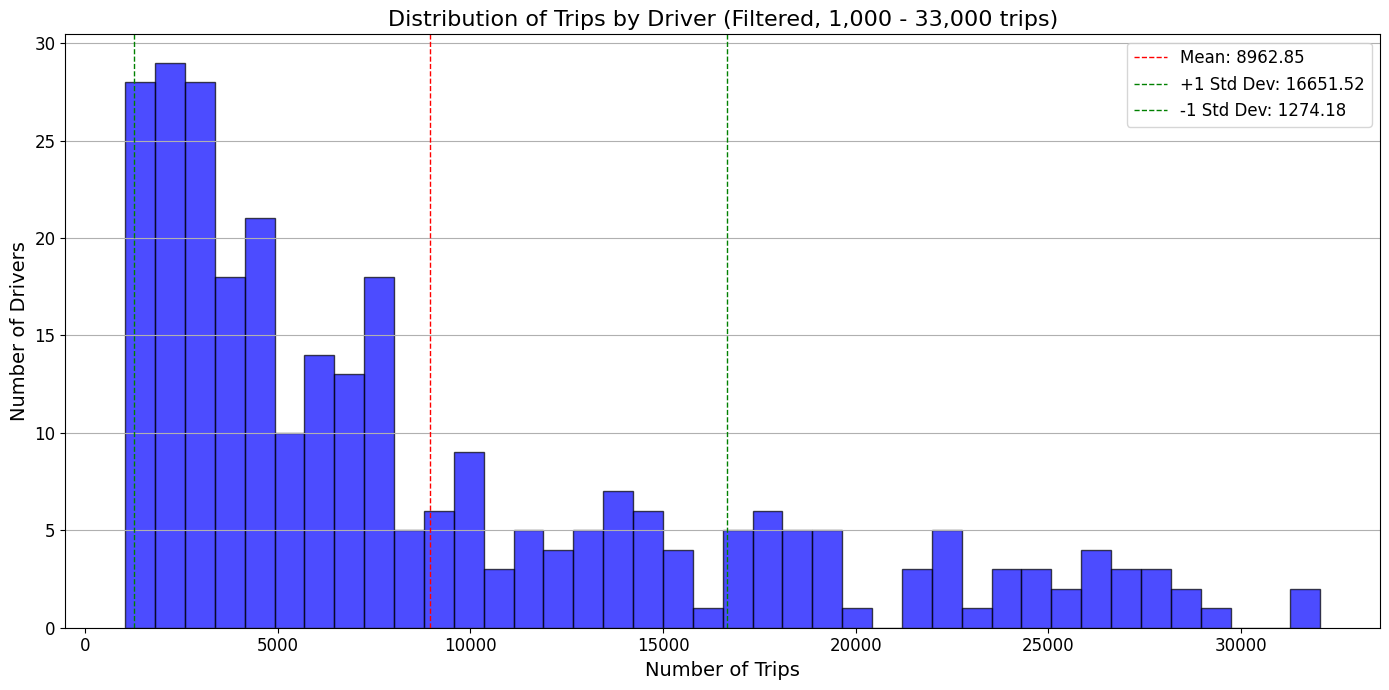

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['Driver_ID', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Calculate the mean and standard deviation of trips per driver
mean_trips_per_driver = filtered_trip_counts['Trip_Count'].mean()
std_trips_per_driver = filtered_trip_counts['Trip_Count'].std()

# Determine the number of drivers who fit this requirement
num_drivers = filtered_trip_counts.shape[0]

# Print the number of drivers
print(f"Number of drivers with between 1,000 and 33,000 trips: {num_drivers}")

# Plot the histogram of trip counts
plt.figure(figsize=(14, 7))
plt.hist(filtered_trip_counts['Trip_Count'], bins=40, edgecolor='black', color='blue', alpha=0.7)
plt.axvline(mean_trips_per_driver, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_trips_per_driver:.2f}')
plt.axvline(mean_trips_per_driver + std_trips_per_driver, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_trips_per_driver + std_trips_per_driver:.2f}')
plt.axvline(mean_trips_per_driver - std_trips_per_driver, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_trips_per_driver - std_trips_per_driver:.2f}')
plt.title('Distribution of Trips by Driver (Filtered, 1,000 - 33,000 trips)', fontsize=16)
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Number of Drivers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Exploration of Energy Metrics
To assess the efficiency of the drivers in terms of energy we focused on net_energy_consumed_by_UT to calculate the energy_per_km and the total_variance.

In [3]:
# Calculate energy consumed per kilometer and per trip for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean',
    'si_siv_ndriver_def': 'size'  # This will count the number of trips
}).rename(columns={'si_siv_ndriver_def': 'trip_count'}).reset_index()

# Rank by energy efficiency (energy_per_km and energy_per_trip)
driver_efficiency_stats = driver_efficiency_stats.sort_values(by=['energy_per_km', 'energy_per_trip'], ascending=True).reset_index(drop=True)

# Display the energy efficiency ratios and trip counts
print("Ranked Energy Efficiency Ratios with Trip Counts (Filtered Drivers):")
print(driver_efficiency_stats)


Ranked Energy Efficiency Ratios with Trip Counts (Filtered Drivers):
    si_siv_ndriver_def  energy_per_km  energy_per_trip  trip_count
0                 2854       4.727528         0.001134       10038
1                 2254       4.756273         0.000766        9344
2                 3374       4.759907         0.000954        8005
3                 3118       4.796844         0.001257        5739
4                 3256       4.799541         0.001567        4680
..                 ...            ...              ...         ...
283               2293       6.634687         0.005453        2028
284               3112       6.695659         0.003371        3163
285               2683       6.705552         0.002028        5069
286               2222       6.764786         0.006709        1550
287               2260       6.890403         0.006923        1041

[288 rows x 4 columns]


In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# OMMITED !!!!!

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Calculate energy consumed per kilometer and per trip for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for net_energy_consumed_by_UT
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')['net_energy_consumed_by_UT'].var().reset_index()
driver_energy_variance.columns = ['si_siv_ndriver_def', 'variance_net_energy_consumed']

# Merge the efficiency stats and variance data with the trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and variance
scaler = MinMaxScaler()
driver_stats[['normalized_energy_per_km', 'normalized_variance_net_energy']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'variance_net_energy_consumed']]
)

# Rank drivers based on energy_per_km and variance_net_energy_consumed separately
driver_stats = driver_stats.sort_values(by=['normalized_energy_per_km', 'normalized_variance_net_energy'], ascending=[True, True]).reset_index(drop=True)

# Display the ranked drivers
print("Ranked Drivers Based on Energy per Km and Variance:")
print(driver_stats[['si_siv_ndriver_def', 'normalized_energy_per_km', 'normalized_variance_net_energy', 'Trip_Count', 'energy_per_km', 'energy_per_trip', 'variance_net_energy_consumed']])


Ranked Drivers Based on Energy per Km and Variance:
    si_siv_ndriver_def  normalized_energy_per_km  \
0                 2854                  0.000000   
1                 2254                  0.013290   
2                 3374                  0.014971   
3                 3118                  0.032048   
4                 3256                  0.033295   
..                 ...                       ...   
283               2293                  0.881770   
284               3112                  0.909961   
285               2683                  0.914535   
286               2222                  0.941922   
287               2260                  1.000000   

     normalized_variance_net_energy  Trip_Count  energy_per_km  \
0                          0.431546       10038       4.727528   
1                          0.063265        9344       4.756273   
2                          0.075848        8005       4.759907   
3                          0.035739        5739       4.796

# Initial Ranking Inspection
We graphed the drivers using their average variance in energy consumption and energy per km across all the trips each driver logged. We normalized the metrics to effetively graph the drivers and use the values for comparison.

   energy_per_km  energy_per_trip
0       4.063448         0.000959
1      13.391084         0.003657
2      15.948984         0.005920
3       8.971910         0.001641
4       3.214706         0.000937
Ranked Drivers Based on Energy per Km and Variance:
    si_siv_ndriver_def  normalized_energy_per_km  \
0                 2854                  0.000000   
1                 2254                  0.013290   
2                 3374                  0.014971   
3                 3118                  0.032048   
4                 3256                  0.033295   
..                 ...                       ...   
283               2293                  0.881770   
284               3112                  0.909961   
285               2683                  0.914535   
286               2222                  0.941922   
287               2260                  1.000000   

     normalized_variance_net_energy  Trip_Count  energy_per_km  \
0                          0.431546       10038      

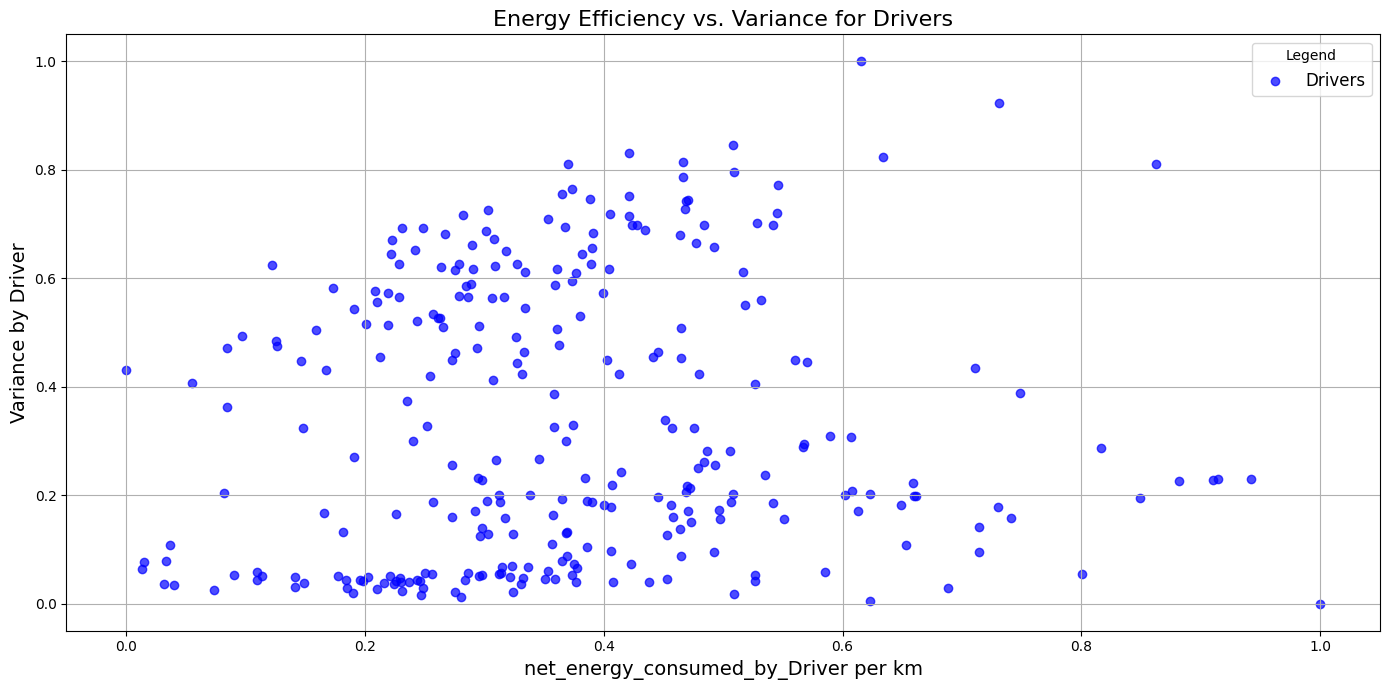

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Count the number of unique trips each driver has driven
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Ensure the new columns are created
print(filtered_df[['energy_per_km', 'energy_per_trip']].head())

# Group by driver and calculate mean energy efficiency ratios
driver_efficiency_stats = filtered_df.groupby('si_siv_ndriver_def').agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for net_energy_consumed_by_UT
driver_energy_variance = filtered_df.groupby('si_siv_ndriver_def')['net_energy_consumed_by_UT'].var().reset_index()
driver_energy_variance.columns = ['si_siv_ndriver_def', 'variance_net_energy_consumed']

# Merge the efficiency stats and variance data with the trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and variance
scaler = MinMaxScaler()
driver_stats[['normalized_energy_per_km', 'normalized_variance_net_energy']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'variance_net_energy_consumed']]
)

# Rank drivers based on energy_per_km and variance_net_energy_consumed separately
driver_stats = driver_stats.sort_values(by=['normalized_energy_per_km', 'normalized_variance_net_energy'], ascending=[True, True]).reset_index(drop=True)

# Display the ranked drivers
print("Ranked Drivers Based on Energy per Km and Variance:")
print(driver_stats[['si_siv_ndriver_def', 'normalized_energy_per_km', 'normalized_variance_net_energy', 'Trip_Count', 'energy_per_km', 'energy_per_trip', 'variance_net_energy_consumed']])

# Plot scatter plot of energy_per_km vs. variance_net_energy_consumed
plt.figure(figsize=(14, 7))

# Plot data points
plt.scatter(driver_stats['normalized_energy_per_km'], driver_stats['normalized_variance_net_energy'], alpha=0.7, c='blue', label='Drivers')

# Label axes
plt.xlabel('net_energy_consumed_by_Driver per km', fontsize=14)
plt.ylabel('Variance by Driver', fontsize=14)
plt.title('Energy Efficiency vs. Variance for Drivers', fontsize=16)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Categorizing Trips by Energy Consumption
In another exploration not shown here we found that driver performance was affected by driving demanding trips more frequently. We decided to evaluate and categorize the trips into three different groups based on their average net_energy_consumed_by_UT.

Number of unique trips: 168


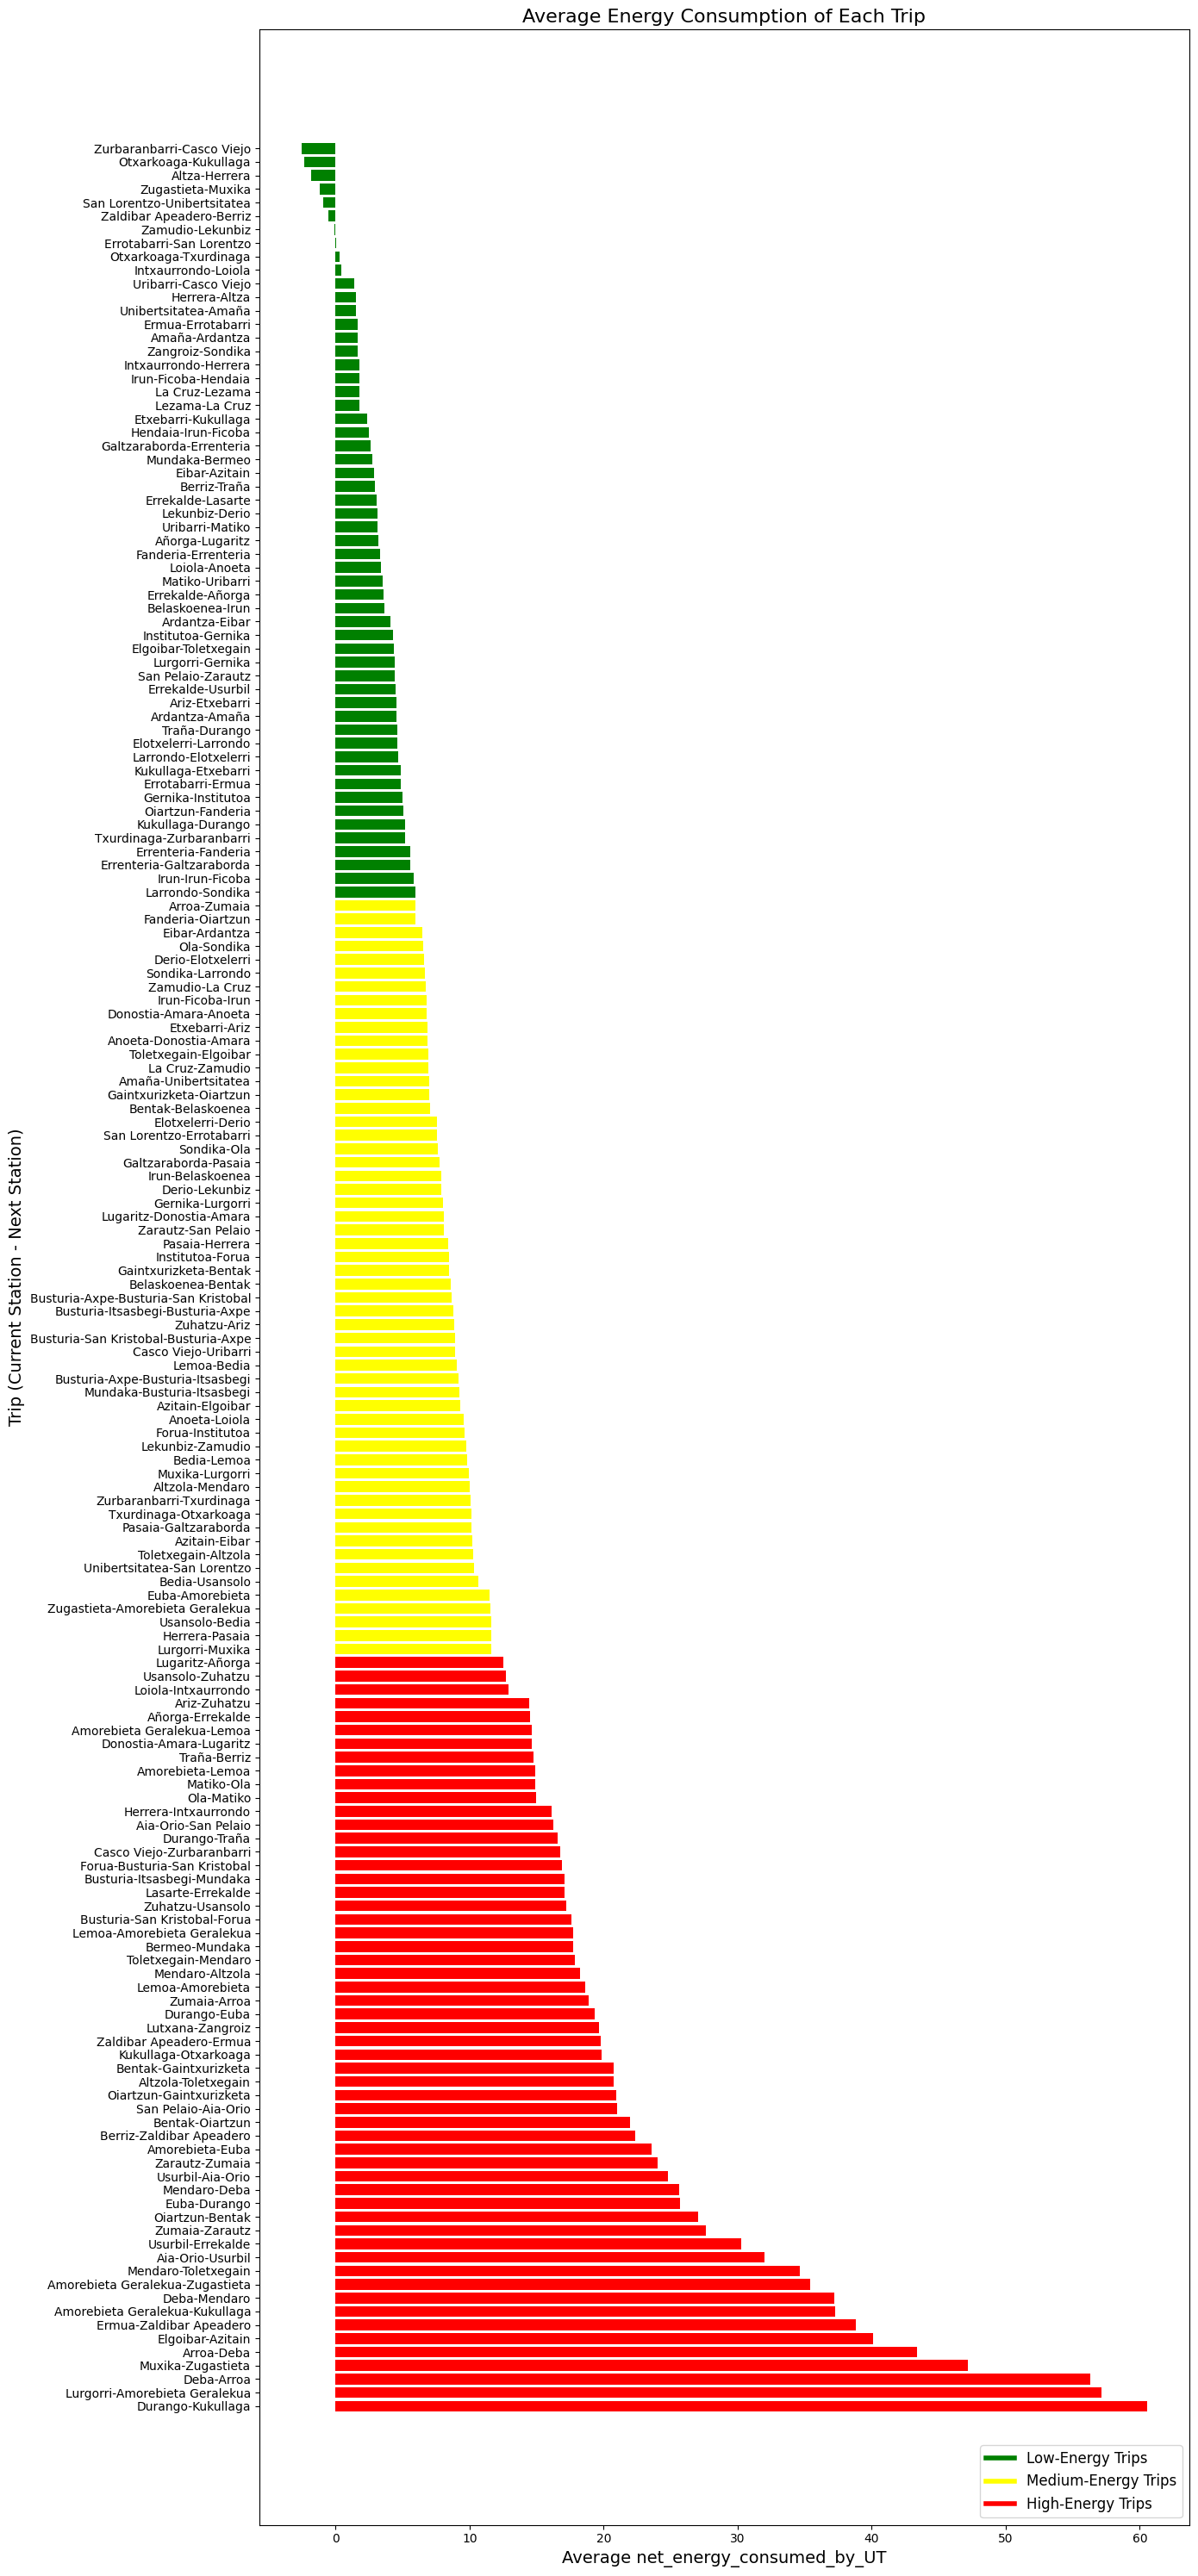

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Count the number of unique trips based on current_station and next_station
df['trip'] = df['current_station'].astype(str) + '-' + df['next_station'].astype(str)
unique_trips = df['trip'].nunique()

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = df.groupby('trip')['net_energy_consumed_by_UT'].mean().reset_index()

# Sort trips by energy consumption
trip_energy_consumption = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption['category'] = pd.qcut(
    trip_energy_consumption['net_energy_consumed_by_UT'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Print the number of unique trips
print(f"Number of unique trips: {unique_trips}")

# Plotting the average energy consumption per trip with categories
plt.figure(figsize=(14, 30))  # Increased figure height for better readability
colors = {'Low-Energy Trips': 'green', 'Medium-Energy Trips': 'yellow', 'High-Energy Trips': 'red'}

bars = plt.barh(trip_energy_consumption['trip'], trip_energy_consumption['net_energy_consumed_by_UT'], 
                color=trip_energy_consumption['category'].map(colors))
plt.xlabel('Average net_energy_consumed_by_UT', fontsize=14)
plt.ylabel('Trip (Current Station - Next Station)', fontsize=14)
plt.title('Average Energy Consumption of Each Trip', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest consumption at the top

# Add a legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
labels = colors.keys()
plt.legend(handles, labels, loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()


# Assessing Performance by Trip Category
This method allows us to find the top performing drivers across all types of trips. 

/var/folders/z2/trcszk_d0yjc_xbp40qt2jqm0000gn/T/ipykernel_76784/2668223504.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
/var/folders/z2/trcszk_d0yjc_xbp40qt2jqm0000gn/T/ipykernel_76784/2668223504.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])['net_energy_consumed_by_UT'].var().reset_index()
/var/folders/z2/trcszk_d0yjc_xbp40qt2jqm0000gn/T/ipykernel_76784/2668223504.py:71: SettingWithCopyWarning: 
A value is trying to be set on a

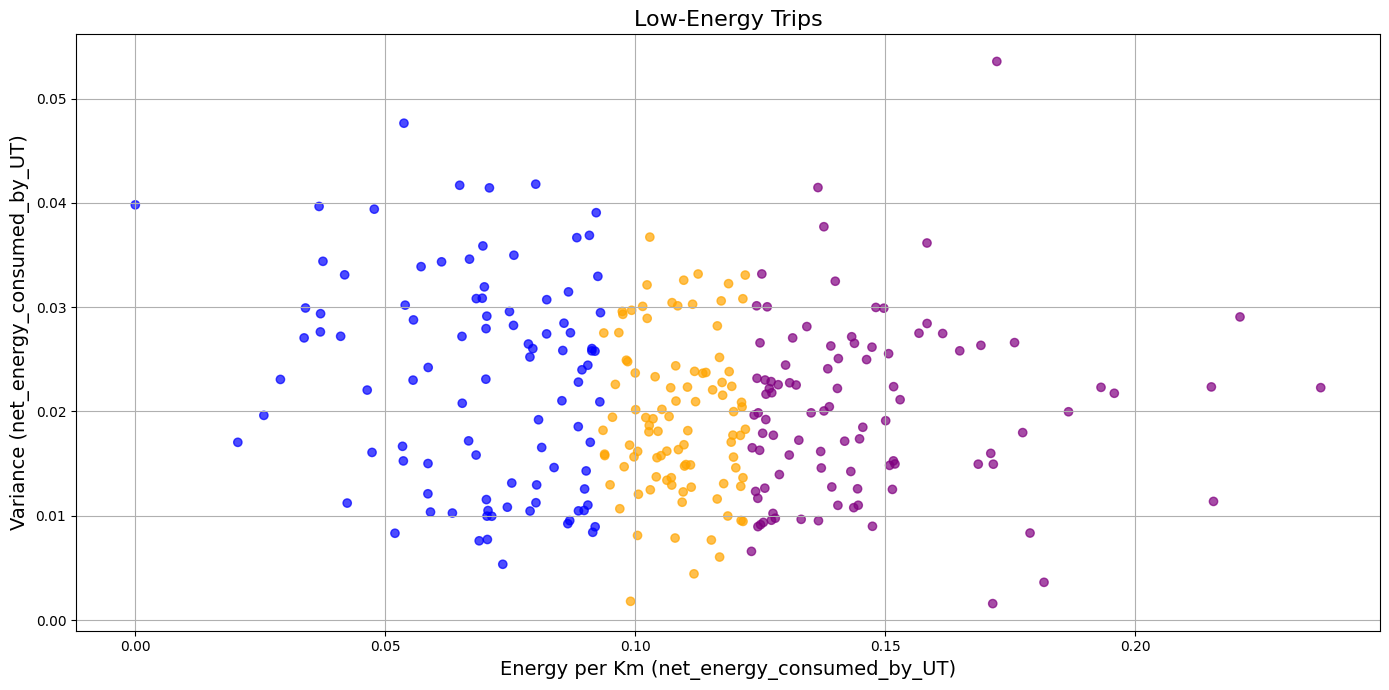

/var/folders/z2/trcszk_d0yjc_xbp40qt2jqm0000gn/T/ipykernel_76784/2668223504.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['color'] = pd.qcut(category_data['energy_per_km'], q=3, labels=['blue', 'orange', 'purple'])


Top 10 Most Efficient Drivers for Low-Energy Trips:
   si_siv_ndriver_def  Trip_Count  Unique_Trips  energy_per_km  \
3                1373        2957            74       0.080110   
6                1629        2098            80       0.069414   
9                1666       14367            96       0.058559   
12               1670        5331            99       0.053747   
15               1672        7823            95       0.047360   
24               1768        4468            99       0.055570   
36               1925       13256           101       0.082313   
39               1963        2186            84       0.037068   
42               2046       16835           101       0.046396   
45               2053        7826            94       0.078646   

    variance_net_energy_consumed  
3                       0.041796  
6                       0.030859  
9                       0.015006  
12                      0.047641  
15                      0.016073  
24         

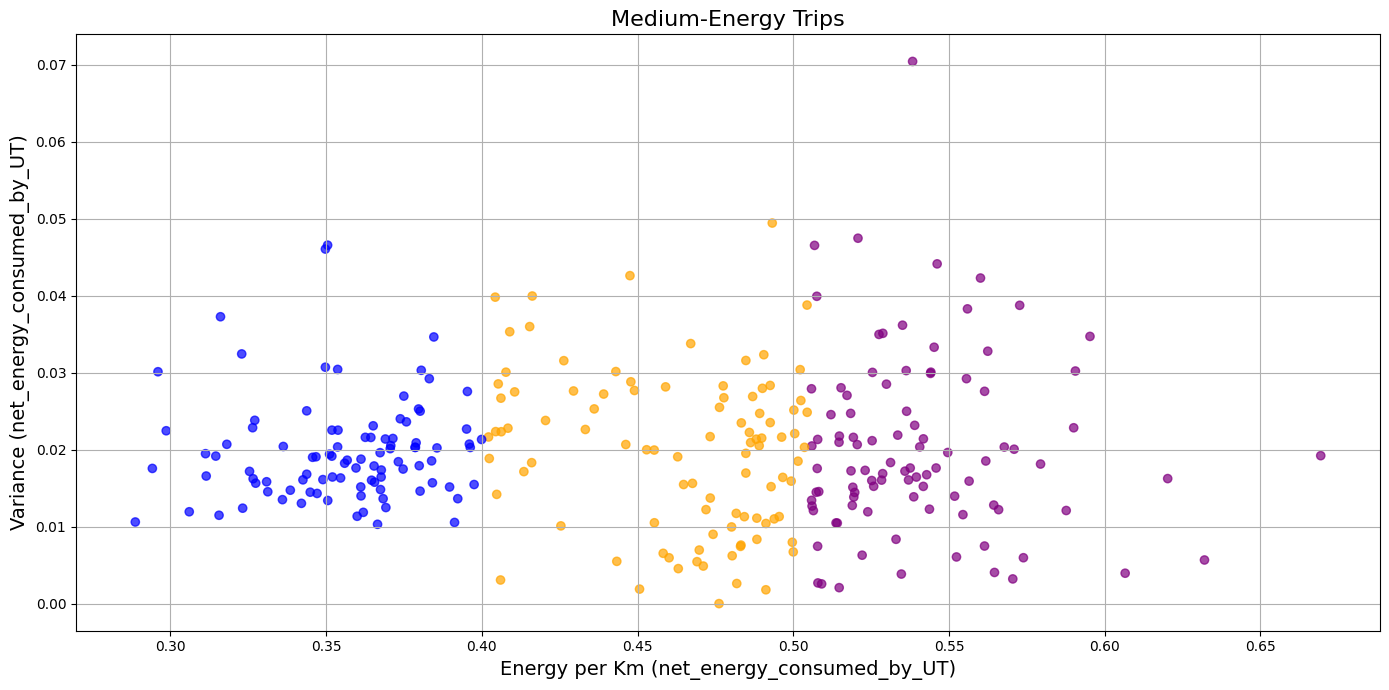

Top 10 Most Efficient Drivers for Medium-Energy Trips:
   si_siv_ndriver_def  Trip_Count  Unique_Trips  energy_per_km  \
10               1666       14367            96       0.351844   
16               1672        7823            95       0.294213   
19               1673       14147           103       0.395362   
37               1925       13256           101       0.350481   
43               2046       16835           101       0.298663   
46               2053        7826            94       0.349765   
49               2080        7977            97       0.380194   
55               2085        2380            89       0.359964   
76               2126        9719            53       0.352034   
88               2202       11813            53       0.347102   

    variance_net_energy_consumed  
10                      0.019153  
16                      0.017559  
19                      0.027554  
37                      0.046561  
43                      0.022452  
46      

/var/folders/z2/trcszk_d0yjc_xbp40qt2jqm0000gn/T/ipykernel_76784/2668223504.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['color'] = pd.qcut(category_data['energy_per_km'], q=3, labels=['blue', 'orange', 'purple'])


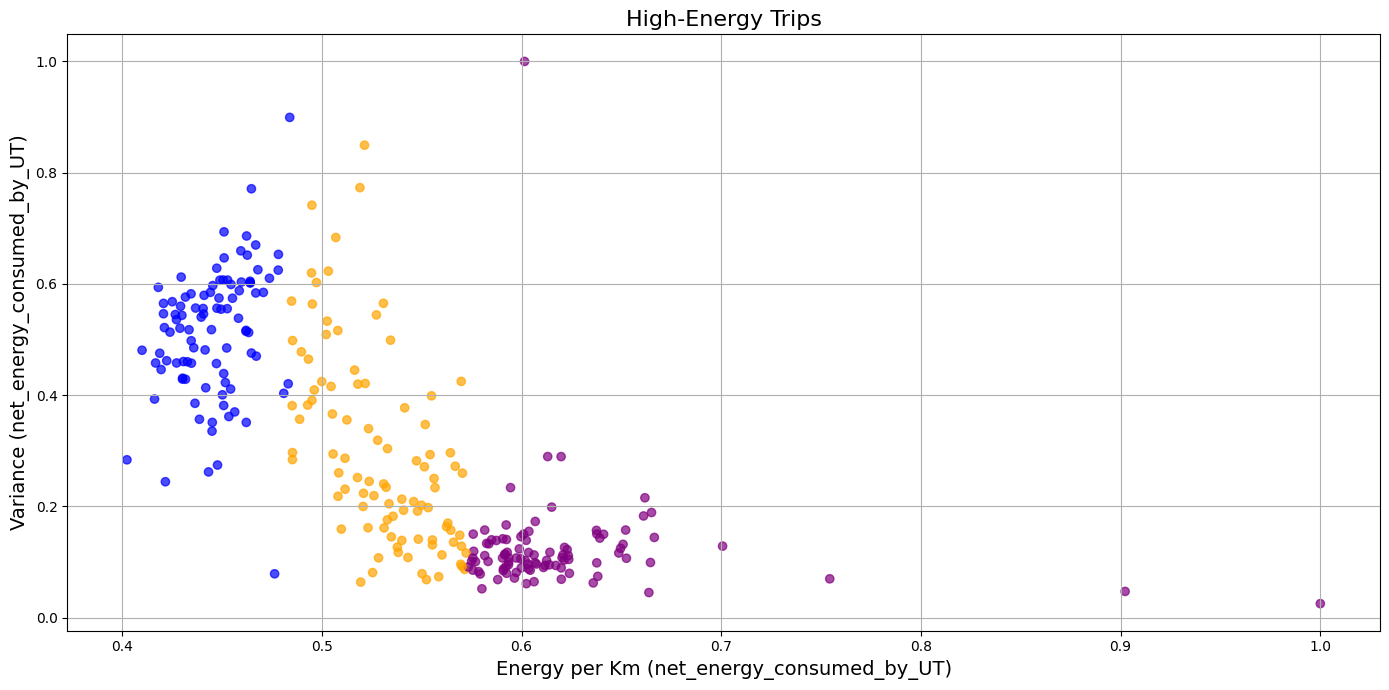

Top 10 Most Efficient Drivers for High-Energy Trips:
    si_siv_ndriver_def  Trip_Count  Unique_Trips  energy_per_km  \
2                    1        3253           126       0.463388   
11                1666       14367            96       0.451718   
17                1672        7823            95       0.450883   
35                1918        1137            85       0.447403   
38                1925       13256           101       0.441885   
44                2046       16835           101       0.445039   
56                2085        2380            89       0.431760   
83                2173        7045            88       0.433527   
92                2221        3269            85       0.464188   
104               2240        7883            94       0.416248   

     variance_net_energy_consumed  
2                        0.512748  
11                       0.422708  
17                       0.381520  
35                       0.628307  
38                       0.41

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]

# Filter the dataset to include only these drivers
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = filtered_df.groupby('trip')['net_energy_consumed_by_UT'].mean().reset_index()

# Sort trips by energy consumption
trip_energy_consumption = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption['category'] = pd.qcut(
    trip_energy_consumption['net_energy_consumed_by_UT'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Merge the categorized trip data back into the filtered_df
filtered_df = filtered_df.merge(trip_energy_consumption[['trip', 'category']], on='trip', how='left')

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios for each category
driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for net_energy_consumed_by_UT within each category
driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])['net_energy_consumed_by_UT'].var().reset_index()
driver_energy_variance.columns = ['si_siv_ndriver_def', 'category', 'variance_net_energy_consumed']

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on=['si_siv_ndriver_def', 'category'])
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'variance_net_energy_consumed']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'variance_net_energy_consumed']]
)

# Define function to plot the scatter plot for a specific category
def plot_category(category, title):
    category_data = driver_stats[driver_stats['category'] == category]
    
    # Define colors based on efficiency
    num_drivers = len(category_data)
    category_data['color'] = pd.qcut(category_data['energy_per_km'], q=3, labels=['blue', 'orange', 'purple'])
    
    plt.figure(figsize=(14, 7))
    
    plt.scatter(category_data['energy_per_km'], category_data['variance_net_energy_consumed'], c=category_data['color'], alpha=0.7, label='Drivers')
    
    plt.xlabel('Energy per Km (net_energy_consumed_by_UT)', fontsize=14)
    plt.ylabel('Variance (net_energy_consumed_by_UT)', fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print top 10 most efficient drivers for this category
    top_10_drivers = category_data[category_data['color'] == 'blue'].head(10)
    print(f"Top 10 Most Efficient Drivers for {category}:")
    print(top_10_drivers[['si_siv_ndriver_def', 'Trip_Count', 'Unique_Trips', 'energy_per_km', 'variance_net_energy_consumed']])

# Plot the scatter plots for each category
plot_category('Low-Energy Trips', 'Low-Energy Trips')
plot_category('Medium-Energy Trips', 'Medium-Energy Trips')
plot_category('High-Energy Trips', 'High-Energy Trips')


# Finding the Best Drivers Through Visual Inspection

Low Energy Trips: Variance: 0 to 0.05 and Energy per KM: 0 to 0.1
Medium Energy Trips: Variance 0 to 0.05 and Energy per KM: 0 to 0.4
High Energy Trips: Variance 0 to 0.4 and Energy per KM: 0 to 0.5
We save two unique Excel files, one which contains a list of all drivers who meet our parameters across the different trip categories and another Excel which only deal with the drivers who met our parameters across each of all categories of trips.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = filtered_df.groupby('trip')['net_energy_consumed_by_UT'].mean().reset_index()

# Sort trips by energy consumption
trip_energy_consumption = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption['category'] = pd.qcut(
    trip_energy_consumption['net_energy_consumed_by_UT'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Merge the categorized trip data back into the filtered_df
filtered_df = filtered_df.merge(trip_energy_consumption[['trip', 'category']], on='trip', how='left')

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios for each category
driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for net_energy_consumed_by_UT within each category
driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])['net_energy_consumed_by_UT'].var().reset_index()
driver_energy_variance.columns = ['si_siv_ndriver_def', 'category', 'variance_net_energy_consumed']

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on=['si_siv_ndriver_def', 'category'])
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'variance_net_energy_consumed']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'variance_net_energy_consumed']]
)

# Filter drivers based on the given criteria
low_energy_drivers = driver_stats[(driver_stats['category'] == 'Low-Energy Trips') & 
                                  (driver_stats['variance_net_energy_consumed'] <= 0.05) & 
                                  (driver_stats['energy_per_km'] <= 0.1)]

medium_energy_drivers = driver_stats[(driver_stats['category'] == 'Medium-Energy Trips') & 
                                     (driver_stats['variance_net_energy_consumed'] <= 0.05) & 
                                     (driver_stats['energy_per_km'] <= 0.4)]

high_energy_drivers = driver_stats[(driver_stats['category'] == 'High-Energy Trips') & 
                                   (driver_stats['variance_net_energy_consumed'] <= 0.4) & 
                                   (driver_stats['energy_per_km'] <= 0.5)]

print("\nLow Energy Drivers:")
print(low_energy_drivers)
print("\nMedium Energy Drivers:")
print(medium_energy_drivers)
print("\nHigh Energy Drivers:")
print(high_energy_drivers)

# Find drivers who fit any of these metrics
any_metric_drivers = pd.concat([low_energy_drivers, medium_energy_drivers, high_energy_drivers]).drop_duplicates('si_siv_ndriver_def')

# Find drivers who fit all of these metrics
drivers_low_set = set(low_energy_drivers['si_siv_ndriver_def'])
drivers_medium_set = set(medium_energy_drivers['si_siv_ndriver_def'])
drivers_high_set = set(high_energy_drivers['si_siv_ndriver_def'])

all_metric_drivers_set = drivers_low_set & drivers_medium_set & drivers_high_set
all_metric_drivers = driver_stats[driver_stats['si_siv_ndriver_def'].isin(all_metric_drivers_set)]

# Save results to Excel files
any_metric_drivers.to_excel('Drivers_Fitting_Any_Value.xlsx', index=False)
all_metric_drivers.to_excel('Drivers_Fitting_All_Values.xlsx', index=False)

# Display the results
print("\nDrivers fitting any Value:")
print(any_metric_drivers)

print("\nDrivers fitting all of the Values:")
print(all_metric_drivers)

/var/folders/z2/trcszk_d0yjc_xbp40qt2jqm0000gn/T/ipykernel_76784/3429992262.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
/var/folders/z2/trcszk_d0yjc_xbp40qt2jqm0000gn/T/ipykernel_76784/3429992262.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])['net_energy_consumed_by_UT'].var().reset_index()



Low Energy Drivers:
    si_siv_ndriver_def          category  energy_per_km  energy_per_trip  \
3                 1373  Low-Energy Trips       0.080110         0.000555   
6                 1629  Low-Energy Trips       0.069414         0.000640   
9                 1666  Low-Energy Trips       0.058559         0.000204   
12                1670  Low-Energy Trips       0.053747         0.000265   
15                1672  Low-Energy Trips       0.047360         0.000419   
..                 ...               ...            ...              ...   
822               3801  Low-Energy Trips       0.092543         0.001650   
828               3818  Low-Energy Trips       0.087055         0.001907   
846               3882  Low-Energy Trips       0.068217         0.000436   
855               3897  Low-Energy Trips       0.082289         0.000419   
861                922  Low-Energy Trips       0.037029         0.001150   

     variance_net_energy_consumed  Trip_Count  Unique_Trips  
3   

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Add a year column based on start_date
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)].copy()

# Create unique trip identifiers
filtered_df['trip'] = filtered_df['current_station'].astype(str) + '-' + filtered_df['next_station'].astype(str)

# Group by trips and calculate average energy consumption for each trip
trip_energy_consumption = filtered_df.groupby('trip')['net_energy_consumed_by_UT'].mean().reset_index()
# Sort trips by energy consumption
trip_energy_consumption = trip_energy_consumption.sort_values(by='net_energy_consumed_by_UT', ascending=True)

# Determine the thresholds for the energy categories
trip_energy_consumption['category'] = pd.qcut(
    trip_energy_consumption['net_energy_consumed_by_UT'],
    q=3,
    labels=['Low-Energy Trips', 'Medium-Energy Trips', 'High-Energy Trips']
)

# Merge the categorized trip data back into the filtered_df
filtered_df = filtered_df.merge(trip_energy_consumption[['trip', 'category']], on='trip', how='left')

# Calculate energy efficiency metrics for each driver
filtered_df['energy_per_km'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df['kilometres']
filtered_df['energy_per_trip'] = filtered_df['net_energy_consumed_by_UT'] / filtered_df.groupby('si_siv_ndriver_def')['ut'].transform('size')

# Group by driver and calculate mean energy efficiency ratios for each category
driver_efficiency_stats = filtered_df.groupby(['si_siv_ndriver_def', 'category']).agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Calculate variance for net_energy_consumed_by_UT within each category
driver_energy_variance = filtered_df.groupby(['si_siv_ndriver_def', 'category'])['net_energy_consumed_by_UT'].var().reset_index()
driver_energy_variance.columns = ['si_siv_ndriver_def', 'category', 'variance_net_energy_consumed']

# Merge the efficiency stats, variance data, and trip counts
driver_stats = pd.merge(driver_efficiency_stats, driver_energy_variance, on=['si_siv_ndriver_def', 'category'])
driver_stats = pd.merge(driver_stats, filtered_trip_counts, on='si_siv_ndriver_def')
unique_trips_per_driver = filtered_df.groupby('si_siv_ndriver_def')['trip'].nunique().reset_index()
unique_trips_per_driver.columns = ['si_siv_ndriver_def', 'Unique_Trips']
driver_stats = pd.merge(driver_stats, unique_trips_per_driver, on='si_siv_ndriver_def')

# Normalize the energy efficiency ratios and variance
scaler = MinMaxScaler()
driver_stats[['energy_per_km', 'variance_net_energy_consumed']] = scaler.fit_transform(
    driver_stats[['energy_per_km', 'variance_net_energy_consumed']]
)

# Filter drivers based on the given criteria
low_energy_drivers = driver_stats[(driver_stats['category'] == 'Low-Energy Trips') & 
                                  (driver_stats['variance_net_energy_consumed'] <= 0.05) & 
                                  (driver_stats['energy_per_km'] <= 0.1)]

medium_energy_drivers = driver_stats[(driver_stats['category'] == 'Medium-Energy Trips') & 
                                     (driver_stats['variance_net_energy_consumed'] <= 0.05) & 
                                     (driver_stats['energy_per_km'] <= 0.4)]

high_energy_drivers = driver_stats[(driver_stats['category'] == 'High-Energy Trips') & 
                                   (driver_stats['variance_net_energy_consumed'] <= 0.4) & 
                                   (driver_stats['energy_per_km'] <= 0.5)]

print("\nLow Energy Drivers:")
print(low_energy_drivers)
print("\nMedium Energy Drivers:")
print(medium_energy_drivers)
print("\nHigh Energy Drivers:")
print(high_energy_drivers)

# Find drivers who fit any of these metrics
any_metric_drivers = pd.concat([low_energy_drivers, medium_energy_drivers, high_energy_drivers]).drop_duplicates('si_siv_ndriver_def')

# Find drivers who fit all of these metrics
drivers_low_set = set(low_energy_drivers['si_siv_ndriver_def'])
drivers_medium_set = set(medium_energy_drivers['si_siv_ndriver_def'])
drivers_high_set = set(high_energy_drivers['si_siv_ndriver_def'])

all_metric_drivers_set = drivers_low_set & drivers_medium_set & drivers_high_set
all_metric_drivers = driver_stats[driver_stats['si_siv_ndriver_def'].isin(all_metric_drivers_set)]

# Merge with the original dataframe to get yearly data for top drivers
top_driver_ids = all_metric_drivers['si_siv_ndriver_def'].unique()
top_driver_yearly_data = filtered_df[filtered_df['si_siv_ndriver_def'].isin(top_driver_ids)]

# Group by driver and year to calculate the average energy per km and per trip for top drivers
top_driver_yearly_stats = top_driver_yearly_data.groupby(['si_siv_ndriver_def', 'year']).agg({
    'energy_per_km': 'mean',
    'energy_per_trip': 'mean'
}).reset_index()

# Merge the yearly stats with the all_metric_drivers dataframe
all_metric_drivers_with_year = pd.merge(all_metric_drivers, top_driver_yearly_stats, on='si_siv_ndriver_def', how='left')

# Save results to Excel files
any_metric_drivers.to_excel('Drivers_Fitting_Any_Metric.xlsx', index=False)
all_metric_drivers_with_year.to_excel('Drivers2_Fitting_All_Metrics.xlsx', index=False)
top_driver_yearly_stats.to_excel('Top_Driver_Yearly_Stats2.xlsx', index=False)

# Display the results
print("\nDrivers fitting any of the metrics:")
print(any_metric_drivers)

print("\nDrivers fitting all of the metrics:")
print(all_metric_drivers_with_year)

print("\nTop driver yearly stats:")
print(top_driver_yearly_stats)


# Calculations
We begin to compare the performance of our top drivers to the average performance across all drivers

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Add a year column based on start_date in the main dataset
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year

# Calculate total energy and total trips for all drivers by year
total_all_drivers = df.groupby('year').agg({
    'net_energy_consumed_by_UT': 'sum',
    'ut': 'size',
    'kilometres': 'sum'
}).reset_index()

# Calculate average energy per trip and per km for all drivers
total_all_drivers['energy_per_km'] = total_all_drivers['net_energy_consumed_by_UT'] / total_all_drivers['kilometres']

# Print the results
print("Total All Drivers:")
print(total_all_drivers[['year', 'energy_per_km']])


Total All Drivers:
   year  energy_per_km
0  2022       5.105113
1  2023       5.210847
2  2024       5.150073


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Calculate the total energy used for all drivers
total_energy_all_drivers = df['net_energy_consumed_by_UT'].sum()

print(f"Total energy used for all drivers: {total_energy_all_drivers:.2f} UT")


Total energy used for all drivers: 30074719.95 UT


Using the average yearly performance of our top 11 drivers we compare their performance to the yearly average perfomance of all drivers.

In [12]:
import pandas as pd

# Data for all drivers
total_all_drivers = pd.DataFrame({
    'year': [2022, 2023, 2024],
    'energy_per_km': [5.105113, 5.210847, 5.150073]
})

# Data for top drivers
top_driver_yearly_stats = pd.DataFrame({
    'start_date': [2022, 2023, 2024],
    'energy_per_km': [5.118117, 4.984787, 4.956890]
})

# Calculate energy savings
comparison_df = pd.merge(total_all_drivers, top_driver_yearly_stats, left_on='year', right_on='start_date')
comparison_df['energy_saved_per_km'] = comparison_df['energy_per_km_x'] - comparison_df['energy_per_km_y']

# Print the comparison results
print("Comparison of average energy per km by year:")
print(comparison_df[['year', 'energy_per_km_x', 'energy_per_km_y', 'energy_saved_per_km']])

# Calculate total energy saved over the years
total_energy_saved_per_km = comparison_df['energy_saved_per_km'].sum()
print(f"\nTotal energy saved per km over the years: {total_energy_saved_per_km:.2f} kWh")

# Calculate average energy saved per year
average_energy_saved_per_km_per_year = comparison_df['energy_saved_per_km'].mean()
print(f"Average energy saved per km per year: {average_energy_saved_per_km_per_year:.2f} kWh")


Comparison of average energy per km by year:
   year  energy_per_km_x  energy_per_km_y  energy_saved_per_km
0  2022         5.105113         5.118117            -0.013004
1  2023         5.210847         4.984787             0.226060
2  2024         5.150073         4.956890             0.193183

Total energy saved per km over the years: 0.41 kWh
Average energy saved per km per year: 0.14 kWh


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Load the top drivers' yearly stats
top_driver_yearly_stats = pd.read_excel('Top_Driver_Yearly_Stats2.xlsx')

# Add a year column based on start_date
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year

# Calculate total kilometers driven each year for all drivers
total_km_all_drivers = df.groupby('year')['kilometres'].sum().reset_index()

# Merge the total kilometers with the previous comparison DataFrame
comparison_df = pd.merge(total_km_all_drivers, comparison_df, on='year')

# Calculate total energy saved per year based on the average energy saved per km
comparison_df['total_energy_saved_per_year'] = comparison_df['kilometres'] * comparison_df['energy_saved_per_km']

# Calculate the total energy saved over all the years
total_energy_saved = comparison_df['total_energy_saved_per_year'].sum()

# Display the updated comparison DataFrame
print("\nUpdated Comparison of average energy per km by year:")
print(comparison_df)

# Display the total energy saved
print(f"\nTotal energy saved over the years: {total_energy_saved:.2f} kWh")


Updated Comparison of average energy per km by year:
   year  kilometres  kilometres_x  kilometres_y  energy_per_km_x  start_date  \
0  2022  2097166.52    2097166.52    2097166.52         5.105113        2022   
1  2023  2761435.72    2761435.72    2761435.72         5.210847        2023   
2  2024   966787.99     966787.99     966787.99         5.150073        2024   

   energy_per_km_y  energy_saved_per_km  total_energy_saved_per_year  
0         5.118117            -0.013004                -27271.553426  
1         4.984787             0.226060                624250.158863  
2         4.956890             0.193183                186767.004272  

Total energy saved over the years: 783745.61 kWh


We noticed there were three drivers who perfromed exceptionnaly well compared to the rest and wanted to see the difference in savings their performance could make. Those drivers are si_siv_ndriver_def: 1672, 2046, 2854

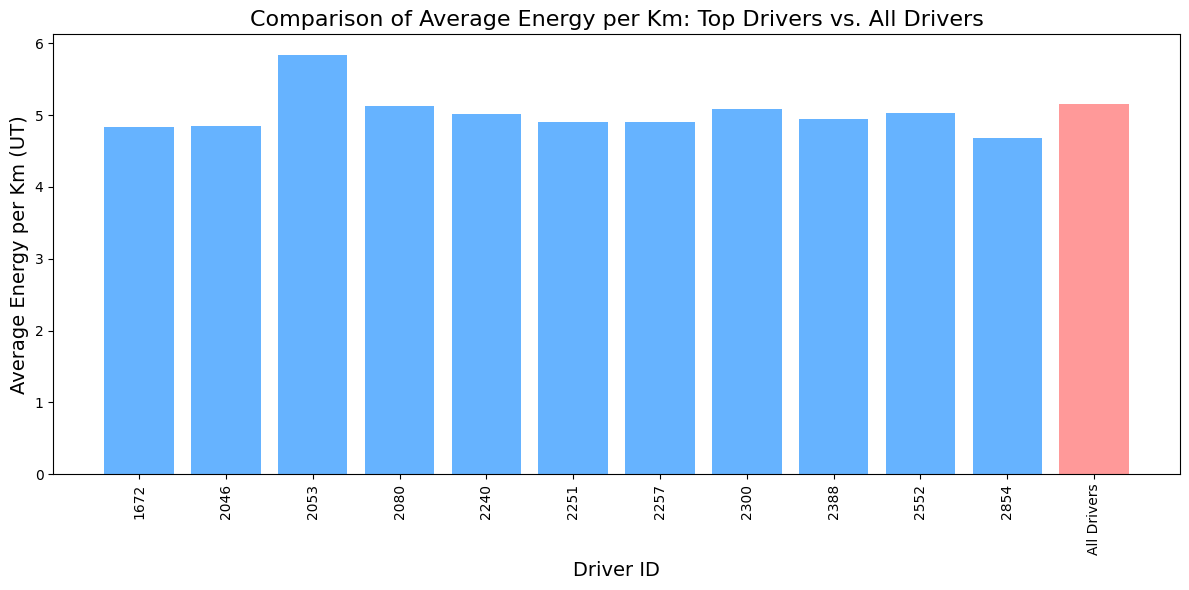

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Load the top drivers' yearly stats
top_driver_yearly_stats = pd.read_excel('Top_Driver_Yearly_Stats2.xlsx')

# Calculate the average energy per km for each top driver over all years
average_energy_per_km_top_drivers = top_driver_yearly_stats.groupby('si_siv_ndriver_def')['energy_per_km'].mean().reset_index()

# Calculate the average energy per km for all drivers over all years
average_energy_per_km_all_drivers = df['net_energy_consumed_by_UT'].sum() / df['kilometres'].sum()

# Add the average for all drivers to the DataFrame
average_energy_per_km_all_drivers_df = pd.DataFrame({
    'si_siv_ndriver_def': ['All Drivers'],
    'energy_per_km': [average_energy_per_km_all_drivers]
})

# Combine the data
combined_df = pd.concat([average_energy_per_km_top_drivers, average_energy_per_km_all_drivers_df], ignore_index=True)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(combined_df['si_siv_ndriver_def'].astype(str), combined_df['energy_per_km'], color=['#66b3ff' if x != 'All Drivers' else '#ff9999' for x in combined_df['si_siv_ndriver_def']])
plt.xlabel('Driver ID', fontsize=14)
plt.ylabel('Average Energy per Km (UT)', fontsize=14)
plt.title('Comparison of Average Energy per Km: Top Drivers vs. All Drivers', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Check the data type and unique values of 'si_siv_ndriver_def' column
print("Data type of 'si_siv_ndriver_def' column:", df['si_siv_ndriver_def'].dtype)
print("Unique values in 'si_siv_ndriver_def' column:")
print(df['si_siv_ndriver_def'].unique())

# Convert 'si_siv_ndriver_def' to integer if necessary
df['si_siv_ndriver_def'] = pd.to_numeric(df['si_siv_ndriver_def'], errors='coerce')

# Drop rows with NaN values in 'si_siv_ndriver_def' after conversion
df = df.dropna(subset=['si_siv_ndriver_def'])

# Convert 'si_siv_ndriver_def' to integer
df['si_siv_ndriver_def'] = df['si_siv_ndriver_def'].astype(int)

# Define the top 3 drivers
top_3_drivers = [2854, 1672, 2046]

# Filter the dataset to only include the rows where 'si_siv_ndriver_def' is one of the top 3 drivers
filtered_df = df[df['si_siv_ndriver_def'].isin(top_3_drivers)]

# Check the filtered dataframe
print("Filtered DataFrame:")
print(filtered_df)

# Display the unique driver IDs in the filtered dataframe to verify that it only contains the top 3 drivers
print("Filtered DataFrame Driver IDs:")
print(filtered_df['si_siv_ndriver_def'].unique())

# Display the shape of the filtered dataframe to see how many rows and columns it contains
print("Filtered DataFrame Shape:", filtered_df.shape)

Data type of 'si_siv_ndriver_def' column: object
Unique values in 'si_siv_ndriver_def' column:
['3321' '2300' '3099' 'No Disponible' '3288' '3270' '2896' '2774' '3295'
 '2867' '2' '3251' '2257' '3234' '2418' '2552' '3230' '3206' '3455' '2994'
 '2880' '3775' '2746' '2248' '3376' '3637' '3246' '2902' '3615' '3456'
 '32' '3' '3487' '3266' '3339' '922' '1687' '3348' '2715' '2687' '2751'
 '3498' '3191' '2107' '2440' '3534' '3626' '3364' '2795' '3540' '2789'
 '2854' '3553' '3331' '3426' '2445' '2859' '3407' '3320' '3361' '3118'
 '3379' '2965' '3419' '3605' '663' '3124' '3443' '2607' '2500' '3310'
 '3702' '3308' '2173' '3741' '3367' '7' '2929' '2080' '3387' '2822' '3454'
 '2925' '1925' '3349' '2819' '3677' '3138' '3468' '2845' '2235' '28'
 '3262' '3476' '3236' '2148' '2126' '3175' '1820' '3470' '2086' '3250'
 '2278' '3296' '2254' '3098' '1670' '3241' '3272' '2683' '3634' '3433'
 '2425' '3471' '2222' '3173' '3360' '3403' '3381' '2468' '13' '3292'
 '3226' '2396' '2886' '2890' '3294' '3678' '335

Average energy per km for top 3 drivers: 4.82 km
Average energy per km for rest of the drivers: 5.18 km


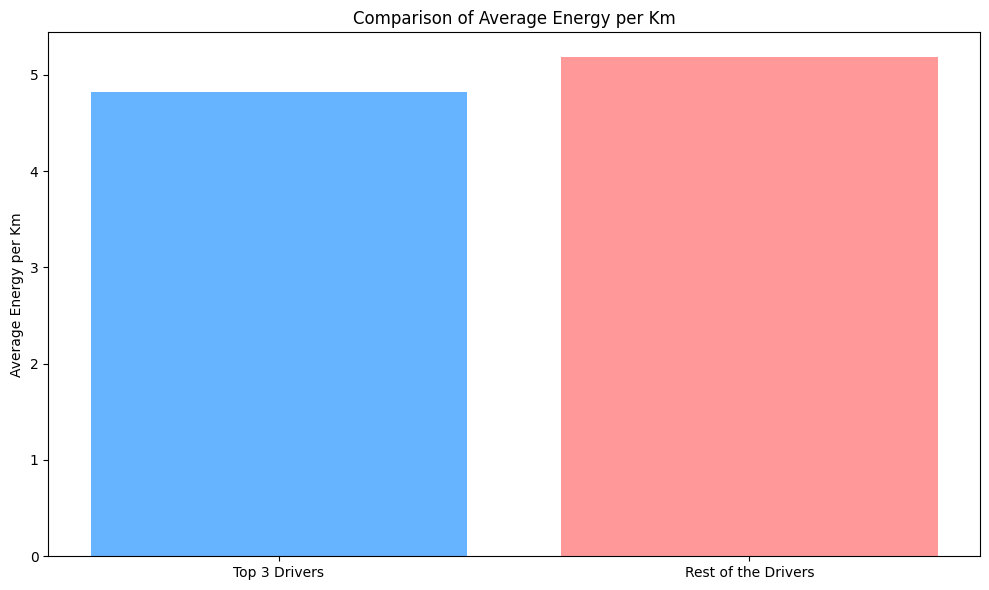

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Convert 'si_siv_ndriver_def' to integer if necessary
df['si_siv_ndriver_def'] = pd.to_numeric(df['si_siv_ndriver_def'], errors='coerce')

# Drop rows with NaN values in 'si_siv_ndriver_def' after conversion
df = df.dropna(subset=['si_siv_ndriver_def'])

# Convert 'si_siv_ndriver_def' to integer
df['si_siv_ndriver_def'] = df['si_siv_ndriver_def'].astype(int)

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']

# Filter the dataset to include only these drivers
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)]

# Define the top 3 drivers
top_3_drivers = [2854, 1672, 2046]

# Filter the dataframe to include only the top 3 drivers
top_3_df = filtered_df[filtered_df['si_siv_ndriver_def'].isin(top_3_drivers)]

# Calculate average energy per km for the top 3 drivers
avg_energy_per_km_top3 = top_3_df['net_energy_consumed_by_UT'].sum() / top_3_df['kilometres'].sum()

# Filter out the top 3 drivers from the filtered dataset to get the rest of the drivers
rest_of_drivers_df = filtered_df[~filtered_df['si_siv_ndriver_def'].isin(top_3_drivers)]

# Calculate average energy per km for the rest of the drivers
avg_energy_per_km_rest = rest_of_drivers_df['net_energy_consumed_by_UT'].sum() / rest_of_drivers_df['kilometres'].sum()

# Print the results
print(f"Average energy per km for top 3 drivers: {avg_energy_per_km_top3:.2f} km")
print(f"Average energy per km for rest of the drivers: {avg_energy_per_km_rest:.2f} km")

# Visualize the comparison
# Data for plotting
categories = ['Top 3 Drivers', 'Rest of the Drivers']
energy_per_km = [avg_energy_per_km_top3, avg_energy_per_km_rest]

# Plot average energy per km
plt.figure(figsize=(10, 6))
plt.bar(categories, energy_per_km, color=['#66b3ff', '#ff9999'])
plt.ylabel('Average Energy per Km')
plt.title('Comparison of Average Energy per Km')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('/Users/thomasrussell/Downloads/Energy_LineApril2022to2024.csv')

# Convert 'si_siv_ndriver_def' to integer if necessary
df['si_siv_ndriver_def'] = pd.to_numeric(df['si_siv_ndriver_def'], errors='coerce')

# Drop rows with NaN values in 'si_siv_ndriver_def' after conversion
df = df.dropna(subset=['si_siv_ndriver_def'])

# Convert 'si_siv_ndriver_def' to integer
df['si_siv_ndriver_def'] = df['si_siv_ndriver_def'].astype(int)

# Add a year column based on start_date
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year

# Count the number of trips each driver has made
trip_counts = df['si_siv_ndriver_def'].value_counts().reset_index()
trip_counts.columns = ['si_siv_ndriver_def', 'Trip_Count']

# Filter drivers who have driven at least 1,000 trips and no more than 33,000 trips
filtered_trip_counts = trip_counts[(trip_counts['Trip_Count'] >= 1000) & (trip_counts['Trip_Count'] <= 33000)]
filtered_driver_ids = filtered_trip_counts['si_siv_ndriver_def']

# Filter the dataset to include only these drivers
filtered_df = df[df['si_siv_ndriver_def'].isin(filtered_driver_ids)]

# Define the top 3 drivers
top_3_drivers = [2854, 1672, 2046]

# Filter the dataframe to include only the top 3 drivers
top_3_df = filtered_df[filtered_df['si_siv_ndriver_def'].isin(top_3_drivers)]

# Filter out the top 3 drivers from the filtered dataset to get the rest of the drivers
rest_of_drivers_df = filtered_df[~filtered_df['si_siv_ndriver_def'].isin(top_3_drivers)]

# Function to calculate average energy per km for a given dataframe and year
def calculate_avg_energy_per_km(df, year):
    df_year = df[df['year'] == year]
    total_energy = df_year['net_energy_consumed_by_UT'].sum()
    total_km = df_year['kilometres'].sum()
    return total_energy / total_km

# Calculate average energy per km for the top 3 drivers and all drivers for each year
results = {}
for year in [2022, 2023, 2024]:
    avg_energy_per_km_top3 = calculate_avg_energy_per_km(top_3_df, year)
    avg_energy_per_km_all = calculate_avg_energy_per_km(filtered_df, year)
    total_km = filtered_df[filtered_df['year'] == year]['kilometres'].sum()
    energy_saved = (avg_energy_per_km_all - avg_energy_per_km_top3) * total_km
    percentage_saved = (energy_saved / (avg_energy_per_km_all * total_km)) * 100
    results[year] = {
        'top3': avg_energy_per_km_top3,
        'all': avg_energy_per_km_all,
        'energy_saved': energy_saved,
        'percentage_saved': percentage_saved
    }

# Calculate total energy savings if all trips were driven by top 3 drivers' averages
total_savings = sum(results[year]['energy_saved'] for year in results)
total_energy_all_drivers = sum(calculate_avg_energy_per_km(filtered_df, year) * filtered_df[filtered_df['year'] == year]['kilometres'].sum() for year in results)

# Calculate percentage savings
percentage_savings = (total_savings / total_energy_all_drivers) * 100

# Print the results for each year
for year in [2022, 2023, 2024]:
    print(f"Year {year}:")
    print(f"  Top 3 average energy per km: {results[year]['top3']:.2f}")
    print(f"  All drivers average energy per km: {results[year]['all']:.2f}")
    print(f"  Energy saved per km: {results[year]['energy_saved']:.2f}")
    print(f"  Percentage energy saved: {results[year]['percentage_saved']:.2f}%")

# Print the total energy savings over the three years
print(f"\nTotal energy savings over the three years: {total_savings:.2f} UT")
print(f"Percentage energy savings over the three years: {percentage_savings:.2f}%")


Year 2022:
  Top 3 average energy per km: 4.91
  All drivers average energy per km: 5.11
  Energy saved per km: 259561.27
  Percentage energy saved: 3.92%
Year 2023:
  Top 3 average energy per km: 4.88
  All drivers average energy per km: 5.21
  Energy saved per km: 858548.76
  Percentage energy saved: 6.43%
Year 2024:
  Top 3 average energy per km: 4.56
  All drivers average energy per km: 5.16
  Energy saved per km: 533388.88
  Percentage energy saved: 11.64%

Total energy savings over the three years: 1651498.92 UT
Percentage energy savings over the three years: 6.73%
